In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from nltk.tokenize import word_tokenize
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from tensorflow.keras.optimizers import Adam
import string
from tqdm import tqdm
tqdm.pandas()

# Ml Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier


#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mksaad/arabic-sentiment-twitter-corpus")

print("Path to dataset files:", path)

100%|██████████| 16.9M/16.9M [00:01<00:00, 9.61MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mksaad/arabic-sentiment-twitter-corpus/versions/2


In [ ]:
os.listdir(path)

['train_Arabic_tweets_negative_20190413.tsv',
 'train_Arabic_tweets_positive_20190413.tsv',
 'test_Arabic_tweets_negative_20190413.tsv',
 'arabic_tweets',
 'test_Arabic_tweets_positive_20190413.tsv']

In [ ]:
os.listdir(path+'/arabic_tweets/neg')

['19842.txt',
 '26533.txt',
 '10915.txt',
 '7698.txt',
 '24152.txt',
 '10280.txt',
 '15843.txt',
 '26034.txt',
 '26398.txt',
 '19702.txt',
 '8886.txt',
 '9019.txt',
 '9956.txt',
 '2319.txt',
 '3945.txt',
 '25231.txt',
 '7973.txt',
 '7075.txt',
 '14953.txt',
 '6828.txt',
 '10991.txt',
 '27533.txt',
 '18334.txt',
 '20382.txt',
 '8737.txt',
 '22763.txt',
 '1545.txt',
 '28649.txt',
 '4952.txt',
 '2582.txt',
 '18025.txt',
 '19591.txt',
 '7641.txt',
 '23277.txt',
 '7775.txt',
 '22127.txt',
 '3171.txt',
 '169.txt',
 '20673.txt',
 '21378.txt',
 '14531.txt',
 '4675.txt',
 '24906.txt',
 '18759.txt',
 '1095.txt',
 '19193.txt',
 '5978.txt',
 '20905.txt',
 '16563.txt',
 '15140.txt',
 '26268.txt',
 '23398.txt',
 '3980.txt',
 '4825.txt',
 '19327.txt',
 '26351.txt',
 '3730.txt',
 '14615.txt',
 '21870.txt',
 '9580.txt',
 '25198.txt',
 '20238.txt',
 '14940.txt',
 '27549.txt',
 '22473.txt',
 '24121.txt',
 '8549.txt',
 '13084.txt',
 '18293.txt',
 '23591.txt',
 '11078.txt',
 '18997.txt',
 '20013.txt',
 '27

In [ ]:
neg_path = path + '/arabic_tweets/neg'
pos_path = path + '/arabic_tweets/pos'

data = []

In [ ]:
for filename in os.listdir(neg_path):
    if filename.endswith(".txt"):
        with open(os.path.join(neg_path, filename), "r", encoding="utf-8") as f:
            text = f.read().strip()
            data.append([text, "neg"])

for filename in os.listdir(pos_path):
    if filename.endswith(".txt"):
        with open(os.path.join(pos_path, filename), "r", encoding="utf-8") as f:
            text = f.read().strip()
            data.append([text, "pos"])

df = pd.DataFrame(data, columns=["text", "label"])

In [ ]:
df.head()

,text,label
0,والله الثلاثة اتفه من بعض العروس كريهة شو يعني...,neg
1,يا صباح الارهاق 😰,neg
2,اصلا واضح انه كذا من صورة بروفايلك 😭,neg
3,بالحيل.. شر وشرير اللهم ياكافي. 😡,neg
4,ما في الا قوة حبوب زرقاء 😭,neg


In [ ]:
df.shape

(58751, 2)

In [ ]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df["label"],
    random_state=42
)


In [ ]:
valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"], random_state=42
)

In [ ]:
print("Train:", len(train_df))
print("Test :", len(test_df))
print("Validation ", len(valid_df))

Train: 41125
Test : 8813
Validation  8813


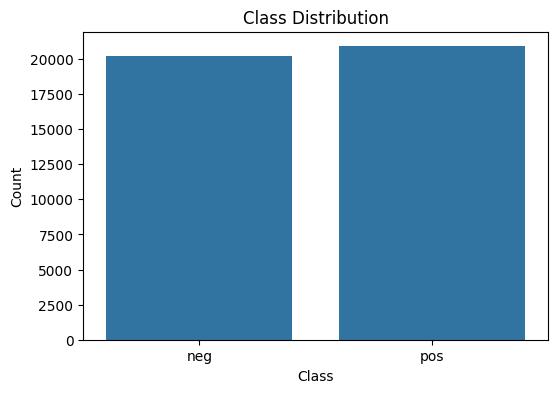

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['label'])

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
train_df.isnull().sum()

,0
text,0
label,0


In [ ]:
test_df.isnull().sum()

,0
text,0
label,0


In [ ]:
import re
def remove_tags(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(' ',text)

In [ ]:
train_df['text']=train_df['text'].progress_apply(lambda x:remove_tags(x))
test_df['text']=test_df['text'].progress_apply(lambda x:remove_tags(x))
valid_df['text']=valid_df['text'].progress_apply(lambda x:remove_tags(x))

100%|██████████| 8813/8813 [00:00<00:00, 386418.44it/s]


In [ ]:
def remove_urls(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(' ',text)

In [ ]:
train_df['text']=train_df['text'].progress_apply(lambda x:remove_urls(x))
test_df['text']=test_df['text'].progress_apply(lambda x:remove_urls(x))
valid_df['text']=valid_df['text'].progress_apply(lambda x:remove_urls(x))

100%|██████████| 8813/8813 [00:00<00:00, 443340.50it/s]


In [ ]:
! pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 40.3 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
def remove_emoji(text):
  return emoji.demojize(text)

In [ ]:
train_df['text']=train_df['text'].progress_apply(lambda x:remove_emoji(x))
test_df['text']=test_df['text'].progress_apply(lambda x:remove_emoji(x))
valid_df['text']=valid_df['text'].progress_apply(lambda x:remove_emoji(x))

100%|██████████| 8813/8813 [00:01<00:00, 7281.76it/s]


In [ ]:
def remove_digits(text):
  pattern=re.compile(r'\d+')
  return pattern.sub(' ',text)

In [ ]:
train_df['text']=train_df['text'].progress_apply(lambda x:remove_digits(x))
test_df['text']=test_df['text'].progress_apply(lambda x:remove_digits(x))
valid_df['text']=valid_df['text'].progress_apply(lambda x:remove_digits(x))

100%|██████████| 8813/8813 [00:00<00:00, 306814.53it/s]


In [ ]:
pun=string.punctuation
pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_pun(text):
  for char in pun:
    text=text.replace(char,'')
  return text

In [ ]:
train_df['text']=train_df['text'].progress_apply(lambda x:remove_pun(x))
test_df['text']=test_df['text'].progress_apply(lambda x:remove_pun(x))
valid_df['text']=valid_df['text'].progress_apply(lambda x:remove_pun(x))

100%|██████████| 8813/8813 [00:00<00:00, 171523.77it/s]


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english','arabic')

In [ ]:
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stopwords])

In [ ]:
train_df['text']=train_df['text'].progress_apply(lambda x:remove_stopwords(x))
test_df['text']=test_df['text'].progress_apply(lambda x:remove_stopwords(x))
valid_df['text']=valid_df['text'].progress_apply(lambda x:remove_stopwords(x))

100%|██████████| 8813/8813 [00:00<00:00, 17637.00it/s]


In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=1000,
    oov_token="<OOV>"
)


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_df['text'])
tokenizer.fit_on_texts(test_df['text'])
tokenizer.fit_on_texts(test_df['text'])

In [ ]:
train_df['text']= tokenizer.texts_to_sequences(train_df['text'])
valid_df['text']= tokenizer.texts_to_sequences(valid_df['text'])
test_df['text'] = tokenizer.texts_to_sequences(test_df['text'])


In [ ]:
for word, index in tokenizer.word_index.items():
    print(word, index)
    if index == 10:
        break

من 1
في 2
الله 3
و 4
على 5
brokenheart 6
لا 7
، 8
ما 9
كل 10


In [ ]:
vocab_size = len(tokenizer.word_index)

In [ ]:
train_df.head()

,text,label
22314,"[45176, 170, 7368, 646, 28820, 200, 45177, 83,...",neg
2955,"[28821, 20, 125, 2096, 250, 67]",neg
53493,"[179, 45179, 152, 45180, 2234, 8, 15, 8663, 8,...",pos
51804,"[1556, 3175, 781, 2532, 920, 935, 1287, 2235, ...",pos
45744,"[3562, 45183, 7369, 9464, 13193, 45184, 11]",pos


In [ ]:
train_lengths = [len(seq) for seq in train_df['text']]
print("Max length:", max(train_lengths))
print("Average length:", sum(train_lengths)/len(train_lengths))


Max length: 38
Average length: 12.524012158054711


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 40
X_train = pad_sequences(train_df['text'], maxlen=maxlen, padding='post')
X_valid = pad_sequences(valid_df['text'], maxlen=maxlen, padding='post')
X_test  = pad_sequences(test_df['text'], maxlen=maxlen, padding='post')


In [ ]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()
y_train = Lb.fit_transform(train_df['label'])
y_test = Lb.transform(test_df['label'])
y_valid = Lb.transform(valid_df['label'])

In [ ]:
print("X_train shape : ",X_train.shape)
print("X_test  shape : ",X_test.shape)

X_train shape :  (41125, 40)
X_test  shape :  (8813, 40)


In [ ]:
model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_shape=[maxlen]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 40, 32)         │     2,608,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 40, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,612,545 (9.97 MB)

 Trainable params: 2,612,417 (9.97 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:

model_rnn.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

history_rnn = model_rnn.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7785 - loss: 0.4478 - val_accuracy: 0.9281 - val_loss: 0.2061
Epoch 2/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9717 - loss: 0.0917 - val_accuracy: 0.7718 - val_loss: 0.6104
Epoch 3/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9834 - loss: 0.0570 - val_accuracy: 0.9197 - val_loss: 0.2367
Epoch 4/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9269 - val_loss: 0.4034
Epoch 5/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9874 - loss: 0.0393 - val_accuracy: 0.9217 - val_loss: 0.4893
Epoch 6/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9237 - val_loss: 0.2462
Epoch 7/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9182 - val_loss: 0.3492
Epoch 8/25
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9893 - loss:

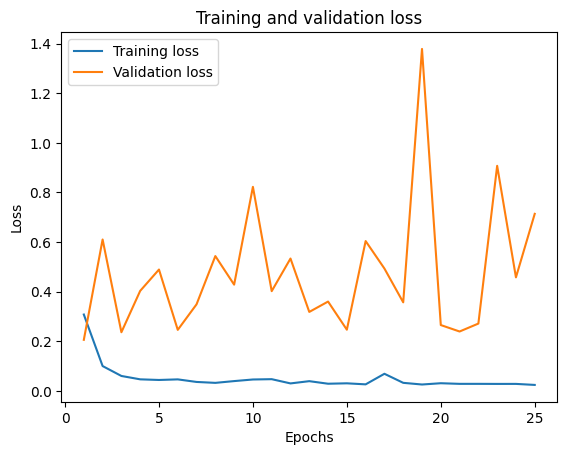

In [ ]:

acc = history_rnn.history['accuracy']
val_acc = history_rnn.history['val_accuracy']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

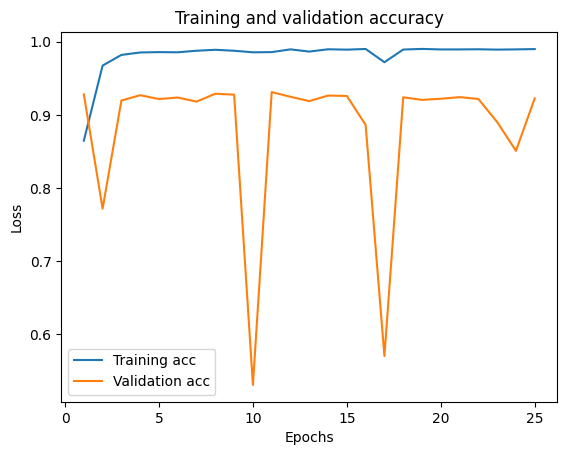

In [ ]:

plt.clf()   # clear figure
acc_values = history_rnn.history['accuracy']
val_acc_values = history_rnn.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred_proba = model_rnn.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).tolist()

class_names = Lb.classes_

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification report : 
               precision    recall  f1-score   support

         neg       0.94      0.90      0.92      4336
         pos       0.91      0.94      0.93      4477

    accuracy                           0.92      8813
   macro avg       0.92      0.92      0.92      8813
weighted avg       0.92      0.92      0.92      8813



In [ ]:
loss, acc = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9237


In [ ]:
model_LSTM = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_shape=[maxlen]),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

NameError: name 'tf' is not defined

In [ ]:
# Compiling the model
model_LSTM.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model_LSTM.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8462 - loss: 0.3360 - val_accuracy: 0.9316 - val_loss: 0.2212
Epoch 2/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9757 - loss: 0.0735 - val_accuracy: 0.9353 - val_loss: 0.2252
Epoch 3/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9856 - loss: 0.0422 - val_accuracy: 0.9341 - val_loss: 0.2731
Epoch 4/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9881 - loss: 0.0349 - val_accuracy: 0.9218 - val_loss: 0.2829
Epoch 5/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9889 - loss: 0.0310 - val_accuracy: 0.9270 - val_loss: 0.2562
Epoch 6/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9895 - loss: 0.0286 - val_accuracy: 0.9333 - val_loss: 0.3689
Epoch 7/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9878 - loss: 0.0322 - val_accuracy: 0.9245 - val_loss: 0.3371
Epoch 8/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9895 -

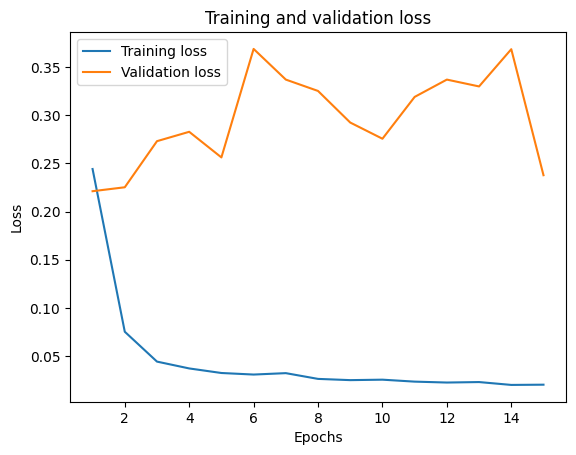

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

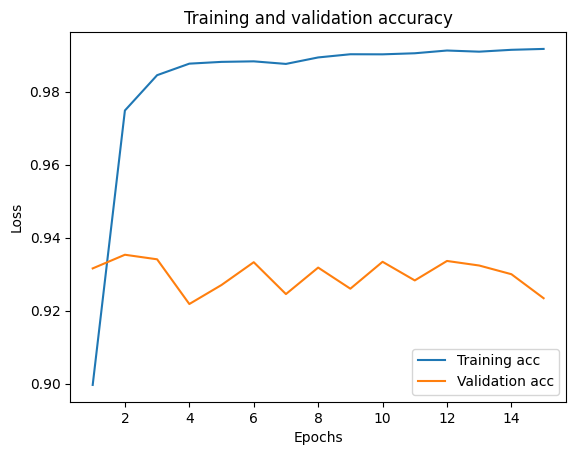

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred_proba = model_LSTM.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).tolist()

class_names = Lb.classes_

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification report : 
               precision    recall  f1-score   support

         neg       0.88      0.97      0.93      4336
         pos       0.97      0.88      0.92      4477

    accuracy                           0.92      8813
   macro avg       0.93      0.92      0.92      8813
weighted avg       0.93      0.92      0.92      8813



In [ ]:
loss, acc = model_LSTM.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9241


In [ ]:
model_GRU = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_shape=[maxlen]),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GRU(32, return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model
model_GRU.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model_GRU.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7996 - loss: 0.3751 - val_accuracy: 0.8685 - val_loss: 0.3944
Epoch 2/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9733 - loss: 0.0845 - val_accuracy: 0.9366 - val_loss: 0.1758
Epoch 3/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9870 - loss: 0.0408 - val_accuracy: 0.9206 - val_loss: 0.2638
Epoch 4/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9893 - loss: 0.0295 - val_accuracy: 0.9260 - val_loss: 0.2767
Epoch 5/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9894 - loss: 0.0260 - val_accuracy: 0.9349 - val_loss: 0.2434
Epoch 6/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9885 - loss: 0.0306 - val_accuracy: 0.9301 - val_loss: 0.2657
Epoch 7/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9887 - loss: 0.0278 - val_accuracy: 0.9368 - val_loss: 0.3221
Epoch 8/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9906 -

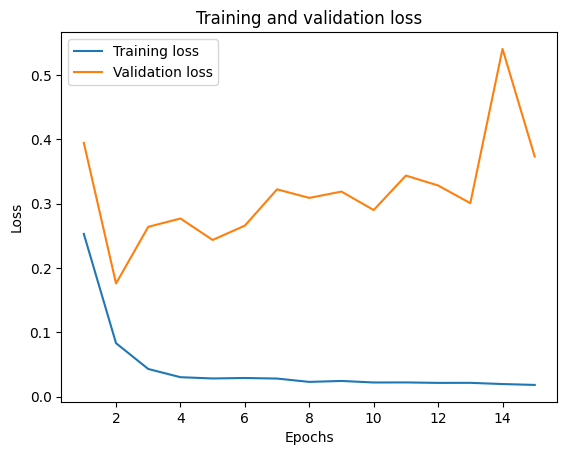

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

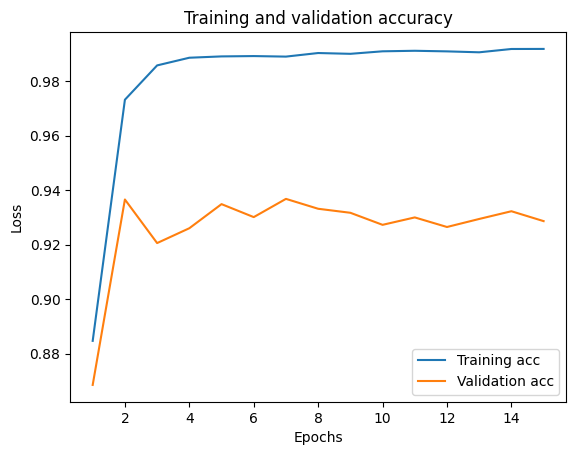

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#
y_pred_proba = model_LSTM.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).tolist()

class_names = Lb.classes_

from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification report : 
               precision    recall  f1-score   support

         neg       0.88      0.97      0.93      4336
         pos       0.97      0.88      0.92      4477

    accuracy                           0.92      8813
   macro avg       0.93      0.92      0.92      8813
weighted avg       0.93      0.92      0.92      8813



In [ ]:
loss, acc = model_GRU.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9302


In [ ]:
model_BI = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_shape=[maxlen]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model
model_BI.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model_BI.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8421 - loss: 0.3339 - val_accuracy: 0.9222 - val_loss: 0.1885
Epoch 2/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9772 - loss: 0.0712 - val_accuracy: 0.9338 - val_loss: 0.2158
Epoch 3/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9868 - loss: 0.0390 - val_accuracy: 0.9341 - val_loss: 0.2507
Epoch 4/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9895 - loss: 0.0274 - val_accuracy: 0.9296 - val_loss: 0.2674
Epoch 5/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9900 - loss: 0.0262 - val_accuracy: 0.9181 - val_loss: 0.2522
Epoch 6/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9901 - loss: 0.0254 - val_accuracy: 0.9314 - val_loss: 0.2717
Epoch 7/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9898 - loss: 0.0258 - val_accuracy: 0.9333 - val_loss: 0.2761
Epoch 8/15
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9902 -

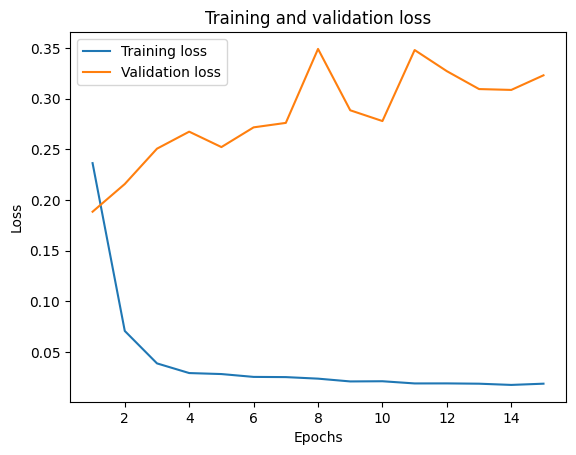

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

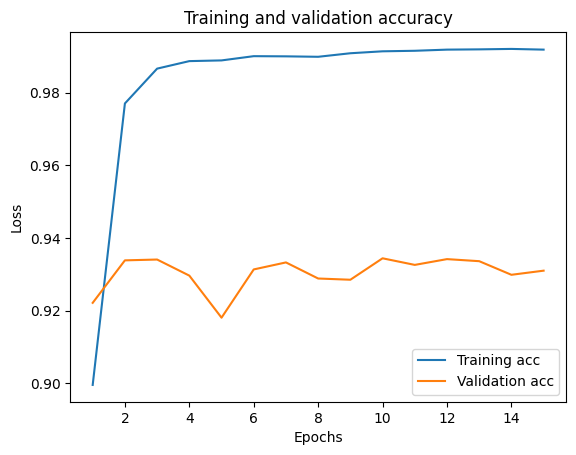

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred_proba = model_rnn.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).tolist()

class_names = Lb.classes_

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification report : 
               precision    recall  f1-score   support

         neg       0.94      0.90      0.92      4336
         pos       0.91      0.94      0.93      4477

    accuracy                           0.92      8813
   macro avg       0.92      0.92      0.92      8813
weighted avg       0.92      0.92      0.92      8813



In [ ]:
loss, acc = model_BI.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9349


In [ ]:
model_BI.save("model_BI.h5")

In [ ]:
from google.colab import files
files.download("model_BI.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>